| Pacjent | Rzeczywistość (chory/zdrowy) | Predykcja modelu |
| ------- | ---------------------------- | ---------------- |
| 1       | chory                        | chory            |
| 2       | chory                        | zdrowy           |
| 3       | chory                        | chory            |
| 4       | zdrowy                       | zdrowy           |
| 5       | zdrowy                       | zdrowy           |
| 6       | zdrowy                       | chory            |
| 7       | zdrowy                       | zdrowy           |
| 8       | chory                        | chory            |
| 9       | zdrowy                       | zdrowy           |
| 10      | zdrowy                       | zdrowy           |



# model działa dobrze:
* model przewiduje, że ktoś jest chory i ten ktoś jest rzeczywiście chory - TP (True Positive)
* ktoś jest zdrowy i model przewiduje, że jest zdrowy -  TN (True Negative)

# model działa źle:
* False Positive FP - model mówi chory, a rzeczywistośc mówi, że jest zdrowy
* Flase Negative FN - model mówi, że zdrowy, ale ten ktoś choruje - najgroźniejsza sytuacja

In [2]:
TP = [1, 3, 8]
TN = [4, 5, 7, 9, 10]
FP = [6]
FN = [2]

In [28]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [21]:
@dataclass
class ConfusionCounts:
    TP: int
    TN: int
    FP: int
    FN: int


d = ConfusionCounts(TP=len(TP), TN=len(TN), FP=len(FP), FN=len(FN))

d

ConfusionCounts(TP=3, TN=5, FP=1, FN=1)

In [17]:
conf_matrix = np.array(
    [[len(TP), len(FP)], [len(FN), len(TN)]],
)

array([[3, 1],
       [1, 5]])

<Axes: >

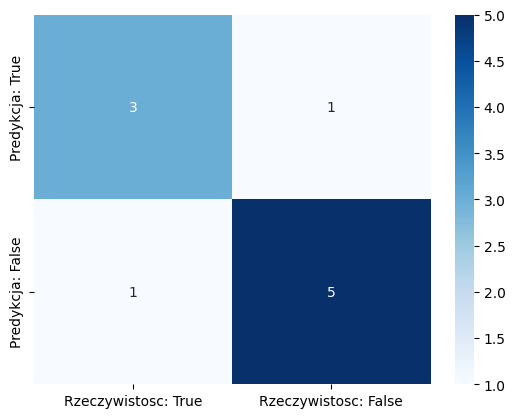

In [18]:
sns.heatmap(
    conf_matrix,
    cmap="Blues",
    xticklabels=("Rzeczywistosc: True", "Rzeczywistosc: False"),
    yticklabels=("Predykcja: True", "Predykcja: False"),
    annot=True,
)

## Accuracy


$$
\text{acurracy} = \frac{TP+TN}{TP+TN+FP+FN}
$$

In [22]:
accuracy = (d.TP + d.TN) / (d.TP + d.TN + d.FP + d.FN)
accuracy

0.8

## Precision


$$
\text{Precision} = \frac{TP}{TP+FP}
$$


## Recall


$$
\text{Recall} = \frac{TP}{TP+FN}
$$

In [23]:
precision = d.TP / (d.TP + d.FP)
recall = d.TP / (d.TP + d.FN)

In [24]:
precision, recall

(0.75, 0.75)

## F1

$$
\text{F1} = 2 \cdot \frac{Precision \cdot Recall}{Recall + Precision}
$$


In [25]:
f1 = 2 * (precision * recall) / (precision + recall)

In [26]:
f1

0.75

In [27]:
##  ROC-AUC i PR-AUC (Area Under Curve)
### ROC - Receiver Operating Characteristic
### PR - Precision Recall

In [30]:
# index, rzeczywistsc, prawdopodobienstwo modelu

dane = [
    (1, 1, 0.90),
    (2, 1, 0.40),
    (3, 1, 0.80),
    (4, 0, 0.10),
    (5, 0, 0.20),
    (6, 0, 0.70),
    (7, 0, 0.05),
    (8, 1, 0.60),
    (9, 0, 0.15),
    (10, 0, 0.30),
]

df = pd.DataFrame(dane, columns=["id", "y_true", "pred"])
df

,id,y_true,pred
0,1,1,0.90
1,2,1,0.40
2,3,1,0.80
3,4,0,0.10
4,5,0,0.20
5,6,0,0.70
6,7,0,0.05
7,8,1,0.60
8,9,0,0.15
9,10,0,0.30


In [31]:
df["labelka"] = np.where(df["y_true"] == 1, "chory", "zdrowy")
df

,id,y_true,pred,labelka
0,1,1,0.90,chory
1,2,1,0.40,chory
2,3,1,0.80,chory
3,4,0,0.10,zdrowy
4,5,0,0.20,zdrowy
5,6,0,0.70,zdrowy
6,7,0,0.05,zdrowy
7,8,1,0.60,chory
8,9,0,0.15,zdrowy
9,10,0,0.30,zdrowy


In [35]:
progi = [0.9, 0.7, 0.5, 0.3, 0.1]

df = df.assign(**{f"pred@{t:.2f}": (df["pred"] >= t).astype(int) for t in progi})
df

pred_cols = [f"pred@{t:.2f}" for t in progi]
pred_cols

df = df[["id", "labelka", "y_true", "pred"] + pred_cols]
df

,id,labelka,y_true,pred,pred@0.90,pred@0.70,pred@0.50,pred@0.30,pred@0.10
0,1,chory,1,0.90,1,1,1,1,1
1,2,chory,1,0.40,0,0,0,1,1
2,3,chory,1,0.80,0,1,1,1,1
3,4,zdrowy,0,0.10,0,0,0,0,1
4,5,zdrowy,0,0.20,0,0,0,0,1
5,6,zdrowy,0,0.70,0,1,1,1,1
6,7,zdrowy,0,0.05,0,0,0,0,0
7,8,chory,1,0.60,0,0,1,1,1
8,9,zdrowy,0,0.15,0,0,0,0,1
9,10,zdrowy,0,0.30,0,0,0,1,1


## TPR = True Positive Rate

TPR = Recall

## FPR = False Positive Rate

$FPR = FP/(FP+TN)$

In [36]:
np.asarray(df.y_true)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [37]:
def confusion_counts(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    TP = int(((y_true == 1) & (y_pred == 1)).sum())
    FP = int(((y_true == 0) & (y_pred == 1)).sum())
    TN = int(((y_true == 0) & (y_pred == 0)).sum())
    FN = int(((y_true == 1) & (y_pred == 0)).sum())

    return TP, FP, TN, FN

def metrics(y_true, y_pred):
    TP, FP, TN, FN = confusion_counts(y_true, y_pred)

    total  = TP + FP + TN + FN
    acc = (TP + TN) / total
    prec = TP / (TP + FP) if TP + FP else 0.0
    rec = TP / (TP + FN) if TP + FN else 0.0
    f1 = 2 * prec * rec / (prec + rec) if (prec + rec) else 0.0

    tpr = rec
    fpr = FP / (FP + TN) if FP + TN else 0.0

    return TP, FP, TN, FN, acc, prec, rec, f1, tpr, fpr



In [39]:
rows = []

for col in pred_cols:
    TP, FP, TN, FN, acc, prec, rec, f1, tpr, fpr = metrics(df["y_true"], df[col])
    thr = float(col.split("@", 1)[1]) if "@" in col else None

    rows.append(
        {
            "pred_col": col, 
            "threshold": thr, 
            "TP": TP, "FP": FP, "TN": TN, "FN": FN,
            "accuracy": acc,
            "precision": prec, 
            "recall": rec,
            "f1": f1, 
            "TPR": tpr, 
            "FPR": fpr
            
        }
    )

metrics_df = pd.DataFrame(rows)
metrics_df
                                                           
                                                           

,pred_col,threshold,TP,FP,TN,FN,accuracy,precision,recall,f1,TPR,FPR
0,pred@0.90,0.9,1,0,6,3,0.7,1.000000,0.25,0.400000,0.25,0.000000
1,pred@0.70,0.7,2,1,5,2,0.7,0.666667,0.50,0.571429,0.50,0.166667
2,pred@0.50,0.5,3,1,5,1,0.8,0.750000,0.75,0.750000,0.75,0.166667
3,pred@0.30,0.3,4,2,4,0,0.8,0.666667,1.00,0.800000,1.00,0.333333
4,pred@0.10,0.1,4,5,1,0,0.5,0.444444,1.00,0.615385,1.00,0.833333


ROC AUC = 0.917


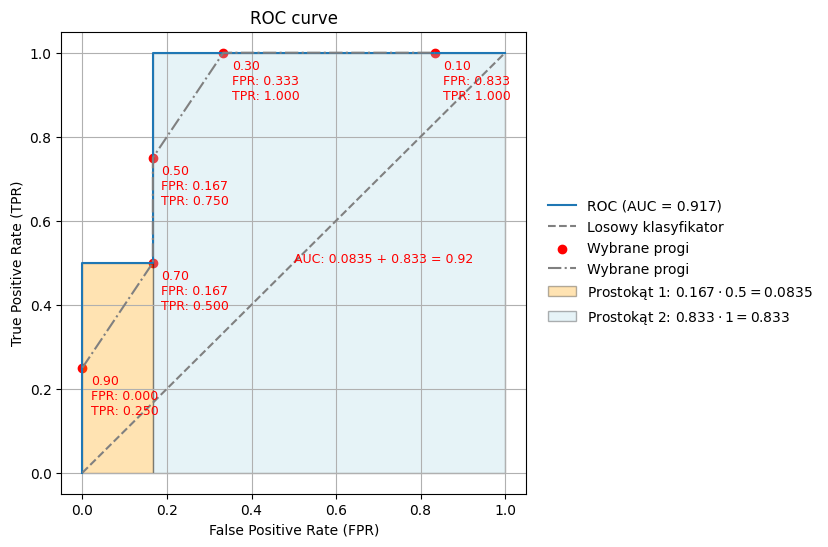

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score


y_true = df["y_true"]
y_score = df["pred"]

roc_auc = roc_auc_score(y_true, y_score)

print(f"ROC AUC = {roc_auc:.3f}")

# --- ROC curve (pełna) ---
fpr, tpr, roc_thr = roc_curve(y_true, y_score)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray", label="Losowy klasyfikator")


# --- punkty z metrics_df  ---
plt.scatter(metrics_df["FPR"], metrics_df["TPR"], color="red", label="Wybrane progi")

# --- zwykłe łączenie punktów ---
plt.plot(metrics_df["FPR"], metrics_df["TPR"], linestyle="-.", color="gray", label="Wybrane progi")

# etykiety progów
for f, t, thr in metrics_df[["FPR", "TPR", "threshold"]].itertuples(index=False):
    plt.text(f+0.02, t-0.11, f"{thr:.2f}\nFPR: {f:.3f}\nTPR: {t:.3f}", fontsize=9, color="red")


krotki_x = 0.167
dlugi_x = 1 - krotki_x

x1 = [0.0, krotki_x, krotki_x, 0.0]
y1 = [0.0, 0.0, 0.5, 0.5]
plt.fill(x1, y1, alpha=0.3, color="orange", edgecolor="black", label=rf"Prostokąt 1: $0.167\cdot0.5={0.167 * 0.5}$")
# 2. prostokąt (wyższy)

x2 = [krotki_x, 1, 1, krotki_x]
y2 = [0, 0, 1, 1]
plt.fill(x2, y2, alpha=0.3, color="lightblue", edgecolor="black", label=rf"Prostokąt 2: ${1-0.167}\cdot1={(1-0.167) * 1}$")


plt.text(0.5, 0.5, f"AUC: {0.167 * 0.5} + {1-0.167} = {0.167*0.5 + 1-0.167:0.2f}", fontsize=9, color="red")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC curve")


plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

plt.grid(True)
plt.show()

Average Precision (AP) = 0.887


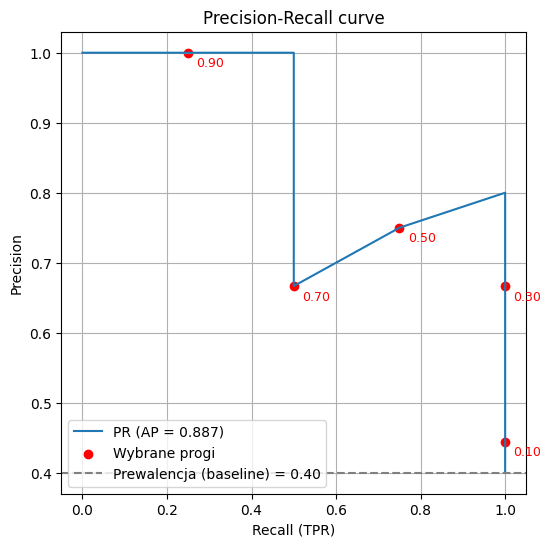

In [45]:
from sklearn.metrics import precision_recall_curve, average_precision_score

avg_prec = average_precision_score(y_true, y_score)
print(f"Average Precision (AP) = {avg_prec:.3f}")

# --- Precision-Recall curve (pełna) ---
prec, rec, pr_thr = precision_recall_curve(y_true, y_score)

plt.figure(figsize=(6,6))
plt.plot(rec, prec, label=f"PR (AP = {avg_prec:.3f})")

# --- punkty z metrics_df (jedna seria) ---
plt.scatter(metrics_df["recall"], metrics_df["precision"], color="red", label="Wybrane progi")

# etykiety progów przy punktach
for r, p, thr in metrics_df[["recall", "precision", "threshold"]].itertuples(index=False):
    plt.text(r+0.02, p-0.02, f"{thr:.2f}", fontsize=9, color="red")


# --- linia prewalencji (baseline losowego klasyfikatora) ---
prevalence = float(np.mean(y_true))  # u Ciebie będzie 0.40
plt.axhline(prevalence, linestyle="--", color="gray",
            label=f"Prewalencja (baseline) = {prevalence:.2f}")

plt.xlabel("Recall (TPR)")
plt.ylabel("Precision")
plt.title("Precision-Recall curve")
plt.legend()
plt.grid(True)
plt.show()


## Regresja

MAE (Mean Absoulte Error)
RMSE (Root Mean Squared Error)
R^2

In [46]:
import numpy as np

# Dane rzeczywiste
y_true = np.array([3.0, 2.5, 4.1])

# 🔹 Przypadek 1: wszystkie przewidywania blisko wartości rzeczywistych
y_pred_good = np.array([2.8, 2.7, 3.9])
rmse_good = np.sqrt(np.mean((y_true - y_pred_good) ** 2))
print("RMSE (małe błędy):", rmse_good)  # ~0.2

# 🔹 Przypadek 2: dwa przewidywania dobre, ale jeden duży błąd
y_pred_bad = np.array([2.8, 2.7, 10.0])
rmse_bad = np.sqrt(np.mean((y_true - y_pred_bad) ** 2))
print("RMSE (duży błąd w 1 elemencie):", rmse_bad)  # ~3.41

RMSE (małe błędy): 0.20000000000000004
RMSE (duży błąd w 1 elemencie): 3.410278580995987


## rekomendacjach

## Rekomendacje i ranking

W systemach rekomendacyjnych (np. Netflix, Spotify, Allegro) oraz w wyszukiwarkach ważne jest **nie tylko przewidzenie** czy coś będzie trafne, ale **na jakiej pozycji** ten wynik się pojawi.
Dlatego oprócz klasycznych miar (MAE, RMSE, R²), używa się metryk **rankingowych**.

---

### Precision@K

$$
Precision@K = \frac{\text{liczba trafnych w top-K}}{K}
$$

* **Co mierzy?** Odsetek trafnych elementów w pierwszych *K* wynikach.
* **Zastosowanie:**

  * rekomendacje produktów – ile z top-5 faktycznie interesuje użytkownika,
  * wyszukiwarki – ile pierwszych 10 wyników jest naprawdę istotnych.

✅ Wysoka precyzja = mało „śmieci” na liście.

---

### Recall@K

$$
Recall@K = \frac{\text{liczba trafnych w top-K}}{\text{wszystkie trafne}}
$$

* **Co mierzy?** Jak duży odsetek wszystkich trafnych elementów udało się pokazać w top-K.
* **Zastosowanie:**

  * ważne, gdy zależy nam, by użytkownik **nie przegapił** wartościowych wyników (np. w medycynie, gdy system ma wykrywać możliwe diagnozy).

✅ Wysoki recall = pokazano większość tego, co istotne, nawet jeśli lista ma też „śmieci”.

---

### MAP (Mean Average Precision)

* Oblicza **średnią dokładność** dla wielu wartości *K*.
* **Co mierzy?** Uwzględnia zarówno precyzję, jak i kolejność, w której pojawiają się trafne elementy.
* **Zastosowanie:**

  * ocena całej listy rankingowej,
  * porównywanie różnych systemów rekomendacyjnych/wyszukiwarek.

---

### nDCG (Normalized Discounted Cumulative Gain)

$$
nDCG@K = \frac{DCG@K}{IDCG@K}
$$
gdzie:
$$
DCG@K = \sum_{i=1}^K \frac{rel_i}{\log_2(i+1)}
$$

* **Co mierzy?** Uwzględnia **istotność wyniku** (relacja $rel_i$) oraz **jego pozycję** na liście.
* **Premiuje systemy**, które trafne wyniki umieszczają wysoko.
* **Zastosowanie:**

  * ranking dokumentów w wyszukiwarce Google,
  * rekomendacje, gdzie wyniki mają różną wartość (np. oceny filmów od 1 do 5).

---

## 🔎 Przykład interpretacji

Załóżmy, że użytkownik szuka filmu. Faktycznie lubi filmy **A, C, E**.
System zwrócił listę: `[A, B, C, D, E]`.

* **Precision@3** = 2/3 (A i C są trafne w top-3).
* **Recall@3** = 2/3 (pokazano 2 z 3 ulubionych filmów).
* **Precision@5** = 3/5 = 0.6.
* **Recall@5** = 3/3 = 1.0 (system pokazał wszystkie ulubione filmy).
* **nDCG@5** będzie wyższe, niż gdyby system dał `[B, D, A, C, E]`, bo A i C znalazły się wyżej na liście.

📌 **Intuicja:** dobre systemy rekomendacyjne starają się **umieścić trafne wyniki jak najwyżej**.

